In [1]:
import numpy as np
np.__version__

'1.19.5'

In [2]:
import pandas as pd
pd.__version__

'1.1.5'

In [3]:
import matplotlib
matplotlib.__version__

'3.1.0'

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [6]:
import scipy
scipy.__version__

'1.5.4'

In [7]:
from scipy import stats

In [8]:
default_max_columns=pd.get_option('display.max_columns')

In [9]:
default_max_rows=pd.get_option('display.max_rows')

In [10]:
default_precision=pd.get_option('display.precision')

In [11]:
pd.set_option('display.precision', 2)

In [12]:
default_threshold=np.get_printoptions()['threshold']

In [13]:
np.set_printoptions(threshold=10000000)

# Read meta data

In [14]:
meta = pd.read_csv('20210428-EV/metadata.csv')

In [15]:
meta.head()

,Rand 2 Batch_order,D-plex Sequencing ID,Lexogen Sequencing ID,Diagnosis
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,"
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,"
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,"
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,"


In [16]:
meta.rename(columns={"Rand 2 Batch_order": "subject"},inplace=True)
meta.rename(columns={"D-plex Sequencing ID": "dplex"},inplace=True)
meta.rename(columns={"Lexogen Sequencing ID": "lexogen"},inplace=True)
meta.rename(columns={"Diagnosis": "diag"},inplace=True)
#meta.set_index('subject',inplace=True)

In [17]:
meta

,subject,dplex,lexogen,diag
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,"
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,"
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,"
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,"
5,1_6,SFHH005f,SFHH006f,"Diffuse Astrocytoma, IDH-mutant,"
6,1_7,SFHH005g,SFHH006g,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
7,1_8,SFHH005h,SFHH006h,"GBM, IDH1R132H WT,"
8,1_9,SFHH005i,SFHH006i,"GBM, IDH-mutant,"
9,1_10,SFHH005j,SFHH006j,"Diffuse Astrocytoma, IDH-mutant,"


In [18]:
meta[['disease','idh','x1p19q']] = meta['diag'].str.split(",", 2, expand=True)
#meta.drop('diag',axis='columns',inplace=True)

In [19]:
meta

,subject,dplex,lexogen,diag,disease,idh,x1p19q
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted",Oligodendroglioma,IDH-mutant,1p19q codeleted
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,",GBM,IDH-mutant,
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,",GBM,IDH-mutant,
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
5,1_6,SFHH005f,SFHH006f,"Diffuse Astrocytoma, IDH-mutant,",Diffuse Astrocytoma,IDH-mutant,
6,1_7,SFHH005g,SFHH006g,"Oligodendroglioma, IDH-mutant, 1p19q codeleted",Oligodendroglioma,IDH-mutant,1p19q codeleted
7,1_8,SFHH005h,SFHH006h,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
8,1_9,SFHH005i,SFHH006i,"GBM, IDH-mutant,",GBM,IDH-mutant,
9,1_10,SFHH005j,SFHH006j,"Diffuse Astrocytoma, IDH-mutant,",Diffuse Astrocytoma,IDH-mutant,


# Read raw matrix

In [20]:
df = pd.read_csv('20210428-EV/report.csv',index_col=0,header=None)

In [21]:
df.shape

(133, 528)

In [22]:
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,519,520,521,522,523,524,525,526,527,528
0,,,,,,,,,,,,,,,,,,,,,
,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005ab,SFHH005ab,SFHH005ab,SFHH005ab,...,SFHH006y,SFHH006y,SFHH006y,SFHH006y,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z
---,---,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,---
Subject,3_5,3_5,3_5,3_5,3_5,3_5,3_6,3_6,3_6,3_6,...,3_3,3_3,3_3,3_3,3_4,3_4,3_4,3_4,3_4,3_4
Lab kit,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,...,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen
Trimmer,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,...,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3
Raw Read Count,7706323,7706323,7706323,7706323,7706323,7706323,10555114,10555114,10555114,10555114,...,10323625,10323625,10323625,10323625,13959130,13959130,13959130,13959130,13959130,13959130
Raw Read Length,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201
Trimmed Read Count,4578177,7054912,7067406,4879448,4877655,4877495,8524196,10205171,10212051,8828603,...,3781877,3796529,3738351,3735601,4571854,4941457,4965205,5007069,4953640,4951125
Trimmed Ave Read Length,57.8849,60.3426,60.5684,132.375,131.86,131.853,57.5903,67.8537,67.9501,152.468,...,35.3093,40.5618,36.6429,35.0324,30.66,35.8833,36.3939,42.7485,39.1607,37.2782


In [23]:
df.drop("---",inplace=True)

In [24]:
df.shape

(132, 528)

In [25]:
df.rename({'  ':'sample'},axis='rows',inplace=True)

In [26]:
df

,1,2,3,4,5,6,7,8,9,10,...,519,520,521,522,523,524,525,526,527,528
0,,,,,,,,,,,,,,,,,,,,,
sample,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005ab,SFHH005ab,SFHH005ab,SFHH005ab,...,SFHH006y,SFHH006y,SFHH006y,SFHH006y,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z
Subject,3_5,3_5,3_5,3_5,3_5,3_5,3_6,3_6,3_6,3_6,...,3_3,3_3,3_3,3_3,3_4,3_4,3_4,3_4,3_4,3_4
Lab kit,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,...,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen
Trimmer,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,...,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3
Raw Read Count,7706323,7706323,7706323,7706323,7706323,7706323,10555114,10555114,10555114,10555114,...,10323625,10323625,10323625,10323625,13959130,13959130,13959130,13959130,13959130,13959130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-6787-5p-mature,799,33,31,1034,1034,1034,560,11,10,607,...,5011,5114,5168,5169,7729,7714,7691,7699,7755,7763
hsa-mir-1281-hairpin,14186,121,103,20096,20096,20096,1706,11,10,2295,...,79,79,79,79,50,50,50,46,48,48
hsa-mir-6887-hairpin,20494,78,68,15303,15303,15303,5381,24,21,3893,...,245,204,205,205,241,241,242,235,237,238


In [27]:
df=df.T

In [28]:
df.head()

,sample,Subject,Lab kit,Trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,hsa-mir-509-1-hairpin,hsa-mir-892b-hairpin,hsa-mir-509-2-hairpin,hsa-mir-509-3-hairpin,hsa-mir-6787-hairpin,hsa-mir-6787-5p-mature,hsa-mir-1281-hairpin,hsa-mir-6887-hairpin,hsa-mir-6887-5p-mature,hsa-mir-3613-3p-mature
1,SFHH005aa,3_5,D-plex,bbduk1,7706323,201,4578177,57.8849,99328,2.16,...,152,166,152,116,874,799,14186,20494,20259,2
2,SFHH005aa,3_5,D-plex,bbduk2,7706323,201,7054912,60.3426,140222,1.98,...,54,161,54,54,36,33,121,78,76,12246
3,SFHH005aa,3_5,D-plex,bbduk3,7706323,201,7067406,60.5684,138584,1.96,...,52,158,52,52,33,31,103,68,66,12209
4,SFHH005aa,3_5,D-plex,cutadapt1,7706323,201,4879448,132.375,105508,2.16,...,276,268,276,276,1255,1034,20096,15303,15056,35
5,SFHH005aa,3_5,D-plex,cutadapt2,7706323,201,4877655,131.86,119834,2.45,...,276,269,276,276,1255,1034,20096,15303,15056,35


In [29]:
df=df.merge(meta,left_on='Subject',right_on='subject')

In [30]:
df.head()

,sample,Subject,Lab kit,Trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,hsa-mir-6887-hairpin,hsa-mir-6887-5p-mature,hsa-mir-3613-3p-mature,subject,dplex,lexogen,diag,disease,idh,x1p19q
0,SFHH005aa,3_5,D-plex,bbduk1,7706323,201,4578177,57.8849,99328,2.16,...,20494,20259,2,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
1,SFHH005aa,3_5,D-plex,bbduk2,7706323,201,7054912,60.3426,140222,1.98,...,78,76,12246,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
2,SFHH005aa,3_5,D-plex,bbduk3,7706323,201,7067406,60.5684,138584,1.96,...,68,66,12209,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
3,SFHH005aa,3_5,D-plex,cutadapt1,7706323,201,4879448,132.375,105508,2.16,...,15303,15056,35,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
4,SFHH005aa,3_5,D-plex,cutadapt2,7706323,201,4877655,131.86,119834,2.45,...,15303,15056,35,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,


In [31]:
df.columns

Index(['sample', 'Subject', 'Lab kit', 'Trimmer', 'Raw Read Count',
       'Raw Read Length', 'Trimmed Read Count', 'Trimmed Ave Read Length',
       'STAR Aligned to Transcriptome', 'STAR Aligned to Transcriptome %',
       ...
       'hsa-mir-6887-hairpin', 'hsa-mir-6887-5p-mature',
       'hsa-mir-3613-3p-mature', 'subject', 'dplex', 'lexogen', 'diag',
       'disease', 'idh', 'x1p19q'],
      dtype='object', length=139)


---
Subject
Lab kit
Trimmer
Raw Read Count
Raw Read Length
Trimmed Read Count
Trimmed Ave Read Length
STAR Aligned to Transcriptome
STAR Aligned to Transcriptome %
STAR Aligned to Genome
STAR Aligned to Genome %
STAR Unaligned
STAR Unaligned %
STAR Unmapped
STAR Unmapped %
Bowtie2 Aligned to hg38 (1)
Bowtie2 Aligned to hg38 (1) %
STAR Aligned to mirna
STAR Aligned to mirna %
Bowtie Aligned to mirna
Bowtie Aligned to mirna %
Bowtie2 Aligned to mirna
Bowtie2 Aligned to mirna %
Bowtie2 Aligned to phiX
Bowtie2 Aligned to phiX %
Bowtie2 Aligned to Salmonella
Bowtie2 Aligned to Salmonella %
Bowtie2 Aligned to Burkholderia
Bowtie2 Aligned to Burkholderia %
STAR Gene Counts
LOC102724859
RPH3A
PLCE1
ADGRG6
CCDC151
IGF2
P2RX6
PIGG
MAPT
MIR486-1
MIR486-2
RO60
RWDD2A
RARS2
LOC100335030
NAALADL2
HASPIN
NOL4L
GOLGA2P10
KCNN3
RNA45SN2
GREM2
RNA45SN3
RNA45SN4
RNA45SN1
RNA45SN5
PACS2
MECP2
CASP1P2
FGD2
KIF18B
MIRLET7BHG
FRMD4A
ZMYM2
GRB10
RNA28SN2
RNA28SN3
RNA28SN1
RNA28SN5
RNA28SN4
AHDC1
INS-IGF2
MICAL2
NOTCH2NLB
TTN
TTC21A
TUBGCP4
WSB1
EDEM3
NACC2
STAR miRNA Counts
hsa-mir-4329-hairpin
hsa-mir-5588-hairpin
hsa-mir-92b-hairpin
hsa-mir-4271-hairpin
hsa-mir-548u-hairpin
hsa-mir-1260a-hairpin
hsa-mir-944-hairpin
hsa-mir-10226-hairpin
hsa-mir-4538-hairpin
hsa-mir-4538-mature
hsa-mir-552-hairpin
hsa-mir-486-1-hairpin
hsa-mir-486-2-hairpin
hsa-mir-3908-hairpin
hsa-mir-3168-hairpin
hsa-mir-3168-mature
hsa-mir-4314-hairpin
hsa-mir-3613-hairpin
hsa-mir-6735-hairpin
hsa-mir-8086-hairpin
hsa-mir-137-hairpin
hsa-mir-552-3p-mature
hsa-mir-4668-hairpin
hsa-mir-4668-5p-mature
hsa-mir-484-hairpin
hsa-mir-486-5p-mature
hsa-mir-216b-hairpin
hsa-mir-3658-hairpin
hsa-mir-4283-2-hairpin
hsa-mir-4283-1-hairpin
hsa-mir-1273c-hairpin
hsa-mir-567-hairpin
hsa-mir-3183-hairpin
hsa-mir-1303-hairpin
hsa-mir-662-hairpin
hsa-mir-184-hairpin
hsa-mir-7110-hairpin
hsa-mir-8052-hairpin
hsa-mir-3613-5p-mature
hsa-mir-8052-mature
hsa-mir-509-1-hairpin
hsa-mir-892b-hairpin
hsa-mir-509-2-hairpin
hsa-mir-509-3-hairpin
hsa-mir-6787-hairpin
hsa-mir-6787-5p-mature
hsa-mir-1281-hairpin
hsa-mir-6887-hairpin
hsa-mir-6887-5p-mature
hsa-mir-3613-3p-mature

In [32]:
mirnas=df.columns[82:132]

In [33]:
df.dtypes[df.columns[82:132]]

hsa-mir-4329-hairpin      object
hsa-mir-5588-hairpin      object
hsa-mir-92b-hairpin       object
hsa-mir-4271-hairpin      object
hsa-mir-548u-hairpin      object
hsa-mir-1260a-hairpin     object
hsa-mir-944-hairpin       object
hsa-mir-10226-hairpin     object
hsa-mir-4538-hairpin      object
hsa-mir-4538-mature       object
hsa-mir-552-hairpin       object
hsa-mir-486-1-hairpin     object
hsa-mir-486-2-hairpin     object
hsa-mir-3908-hairpin      object
hsa-mir-3168-hairpin      object
hsa-mir-3168-mature       object
hsa-mir-4314-hairpin      object
hsa-mir-3613-hairpin      object
hsa-mir-6735-hairpin      object
hsa-mir-8086-hairpin      object
hsa-mir-137-hairpin       object
hsa-mir-552-3p-mature     object
hsa-mir-4668-hairpin      object
hsa-mir-4668-5p-mature    object
hsa-mir-484-hairpin       object
hsa-mir-486-5p-mature     object
hsa-mir-216b-hairpin      object
hsa-mir-3658-hairpin      object
hsa-mir-4283-2-hairpin    object
hsa-mir-4283-1-hairpin    object
hsa-mir-12

In [34]:
#df["normal_"+mirnas]=
#df[mirnas]/df[:,'Raw Read Count']
#tmp['normalized']=
#\df.apply(lambda row: row[mirnas].astype(str).astype(int)/row['Raw Read Count'].astype(str).astype(int), axis=1 )
#df[mirnas]/df.loc[:,'Raw Read Count']

#pd.to_numeric(df[mirna[0]])

#df.apply(lambda row: row[mirnas]/9999, axis=1 )
#df[mirnas].to_numeric()/999


#close but drops non-mirna columns
#df=


#normalize=df.apply(lambda row: 1e9*pd.to_numeric(row[mirnas])/pd.to_numeric(row['Raw Read Count']), axis=1 )


In [35]:
#normalize.columns="normalized_"+normalize[mirnas].columns

In [36]:
#normalize.head()

In [37]:
df[mirnas]=df.apply(lambda row: 1e9*pd.to_numeric(row[mirnas])/pd.to_numeric(row['Raw Read Count']), axis=1 )

In [38]:
df

,sample,Subject,Lab kit,Trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,hsa-mir-6887-hairpin,hsa-mir-6887-5p-mature,hsa-mir-3613-3p-mature,subject,dplex,lexogen,diag,disease,idh,x1p19q
0,SFHH005aa,3_5,D-plex,bbduk1,7706323,201,4578177,57.8849,99328,2.16,...,2.66e+06,2.63e+06,2.60e+02,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
1,SFHH005aa,3_5,D-plex,bbduk2,7706323,201,7054912,60.3426,140222,1.98,...,1.01e+04,9.86e+03,1.59e+06,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
2,SFHH005aa,3_5,D-plex,bbduk3,7706323,201,7067406,60.5684,138584,1.96,...,8.82e+03,8.56e+03,1.58e+06,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
3,SFHH005aa,3_5,D-plex,cutadapt1,7706323,201,4879448,132.375,105508,2.16,...,1.99e+06,1.95e+06,4.54e+03,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
4,SFHH005aa,3_5,D-plex,cutadapt2,7706323,201,4877655,131.86,119834,2.45,...,1.99e+06,1.95e+06,4.54e+03,3_5,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,SFHH006z,3_4,Lexogen,bbduk2,13959130,201,4941457,35.8833,376058,7.61,...,1.73e+04,4.15e+03,2.39e+04,3_4,SFHH005z,SFHH006z,"GBM, IDH-mutant,",GBM,IDH-mutant,
524,SFHH006z,3_4,Lexogen,bbduk3,13959130,201,4965205,36.3939,374821,7.54,...,1.73e+04,4.23e+03,2.36e+04,3_4,SFHH005z,SFHH006z,"GBM, IDH-mutant,",GBM,IDH-mutant,
525,SFHH006z,3_4,Lexogen,cutadapt1,13959130,201,5007069,42.7485,368925,7.36,...,1.68e+04,4.08e+03,3.14e+04,3_4,SFHH005z,SFHH006z,"GBM, IDH-mutant,",GBM,IDH-mutant,
526,SFHH006z,3_4,Lexogen,cutadapt2,13959130,201,4953640,39.1607,372033,7.51,...,1.70e+04,4.23e+03,3.17e+04,3_4,SFHH005z,SFHH006z,"GBM, IDH-mutant,",GBM,IDH-mutant,


In [39]:
df.value_counts(['disease','idh','x1p19q'])

disease              idh            x1p19q          
Oligodendroglioma     IDH-mutant     1p19q codeleted    120
GBM                   IDH1R132H WT                      120
                      IDH-mutant                        120
Diffuse Astrocytoma   IDH-mutant                        120
V01 control (S1)                                         24
blank1 (C1)                                              12
blank 2 (C1)                                             12
dtype: int64

In [40]:
df.value_counts(['diag'])

diag                                          
Oligodendroglioma, IDH-mutant, 1p19q codeleted    120
GBM, IDH1R132H WT,                                120
GBM, IDH-mutant,                                  120
Diffuse Astrocytoma, IDH-mutant,                  120
V01 control (S1),,                                 24
blank1 (C1),,                                      12
blank 2 (C1),,                                     12
dtype: int64

In [41]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

hsa-mir-4329-hairpin D-plex bbduk2
	t = -1.8220299018653567
	p = 0.0851097019733531


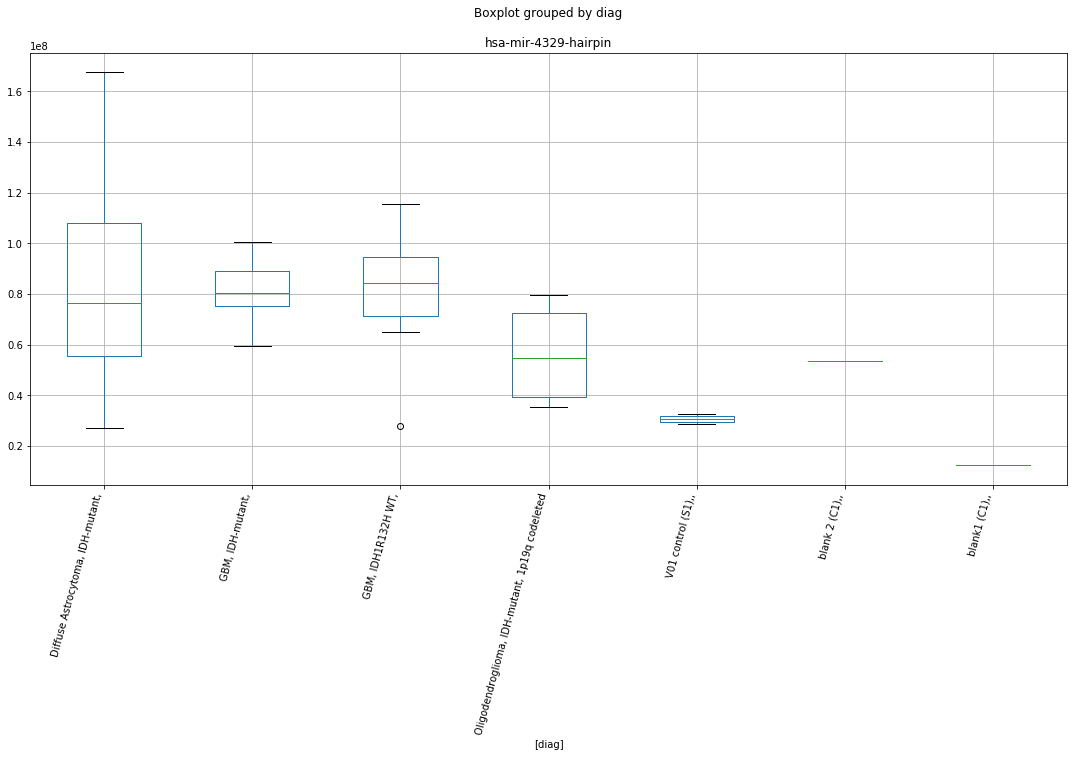

hsa-mir-4329-hairpin D-plex bbduk3
	t = -1.8188362804995875
	p = 0.08561432988659


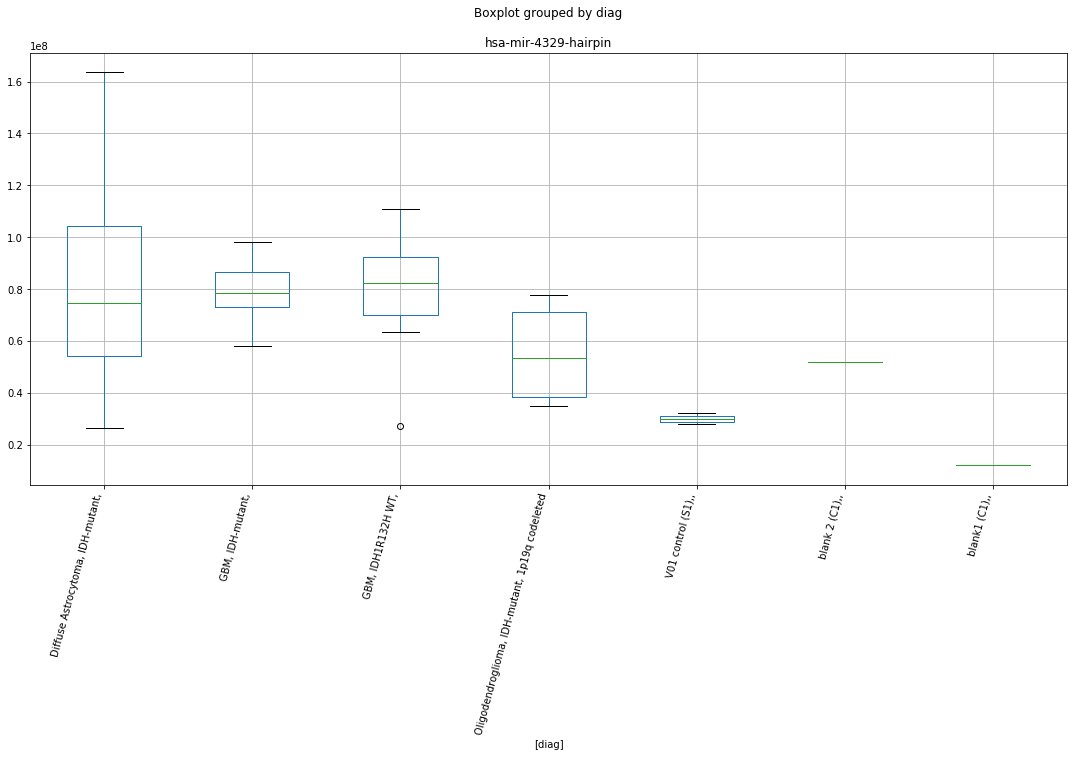

hsa-mir-548u-hairpin D-plex cutadapt1
	t = -1.9083055337899084
	p = 0.07243115896079615


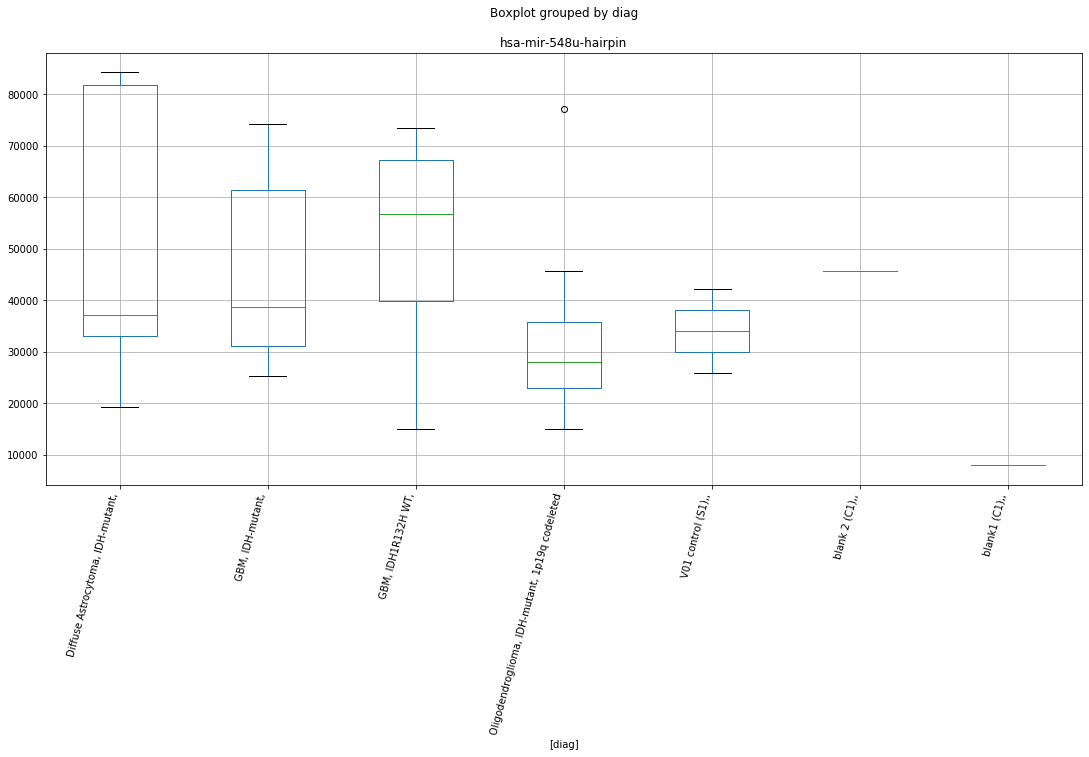

hsa-mir-548u-hairpin D-plex cutadapt2
	t = -1.9083055337899084
	p = 0.07243115896079615


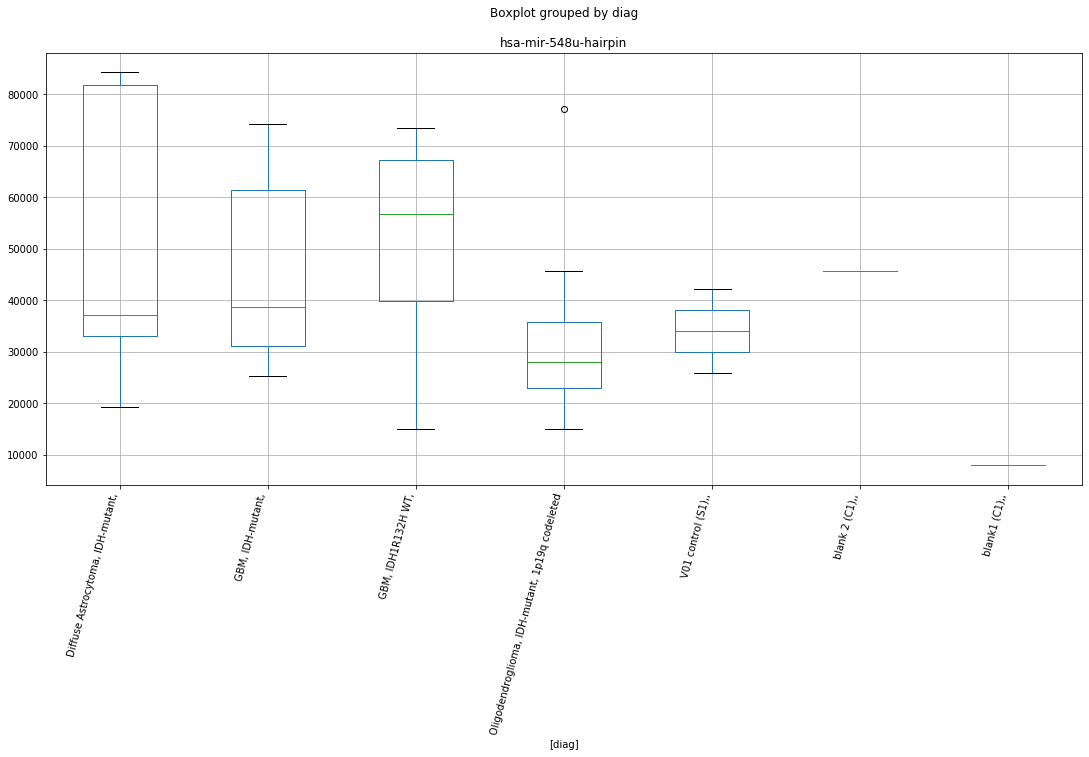

hsa-mir-548u-hairpin D-plex cutadapt3
	t = -1.9083055337899084
	p = 0.07243115896079615


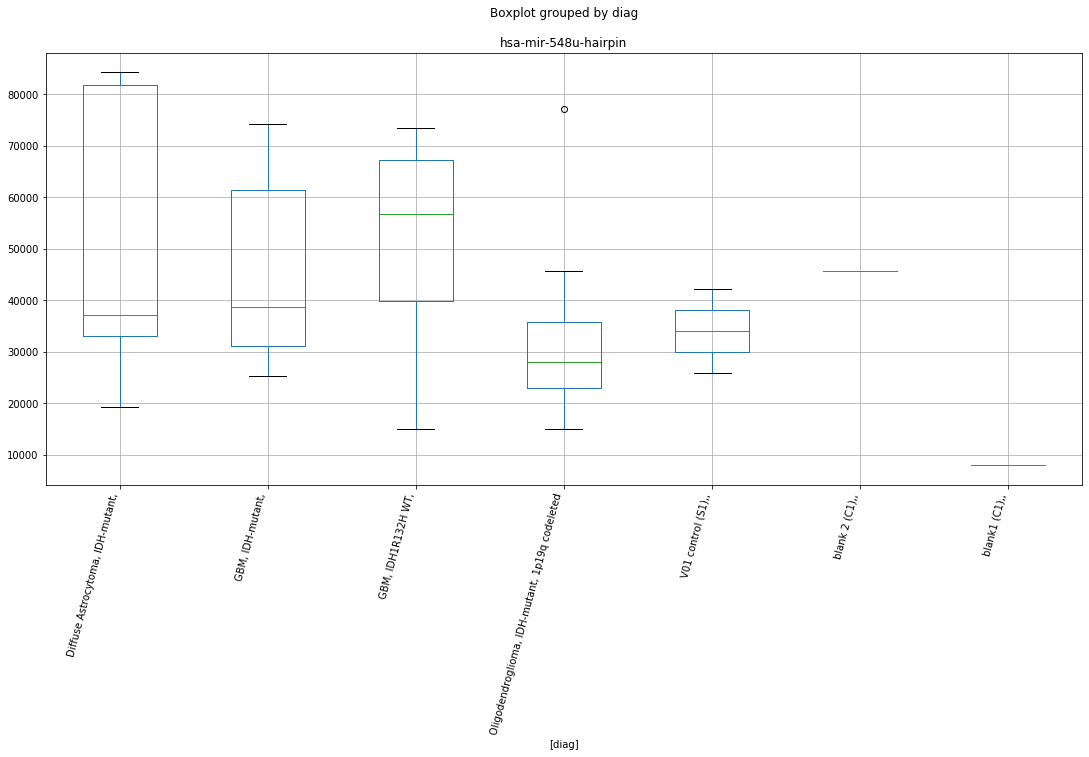

hsa-mir-3908-hairpin D-plex bbduk2
	t = -1.745027441956704
	p = 0.09802860052579611


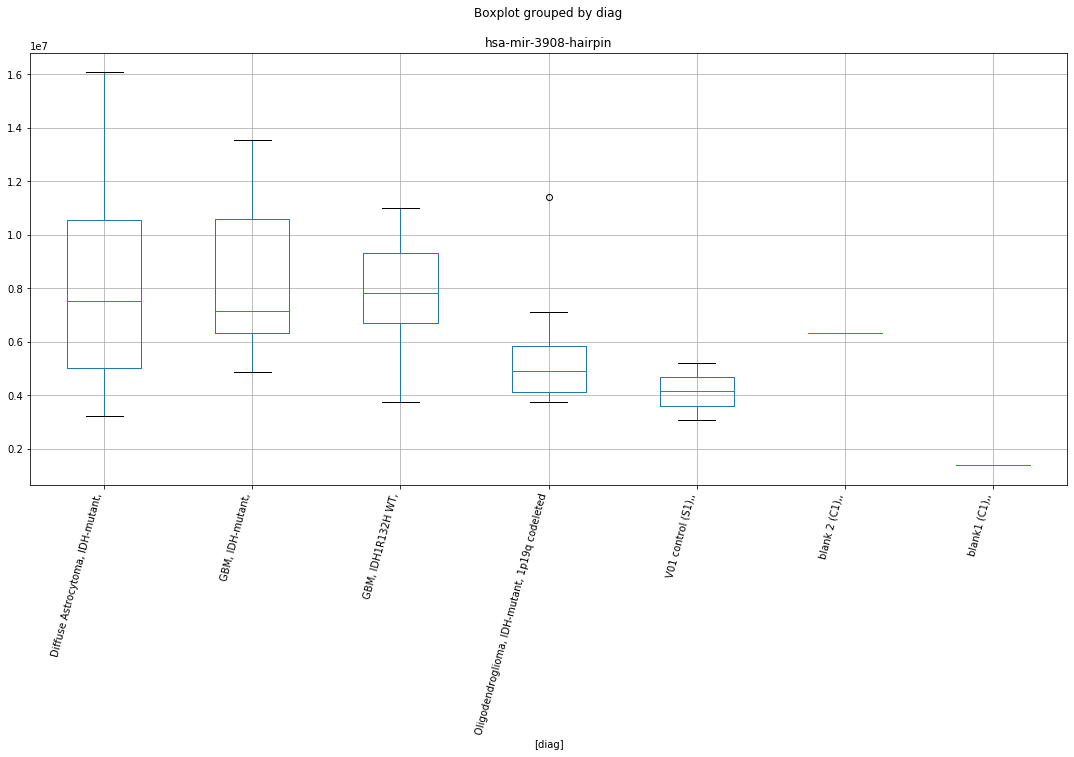

hsa-mir-3908-hairpin D-plex bbduk3
	t = -1.7478124262019827
	p = 0.09753322842163667


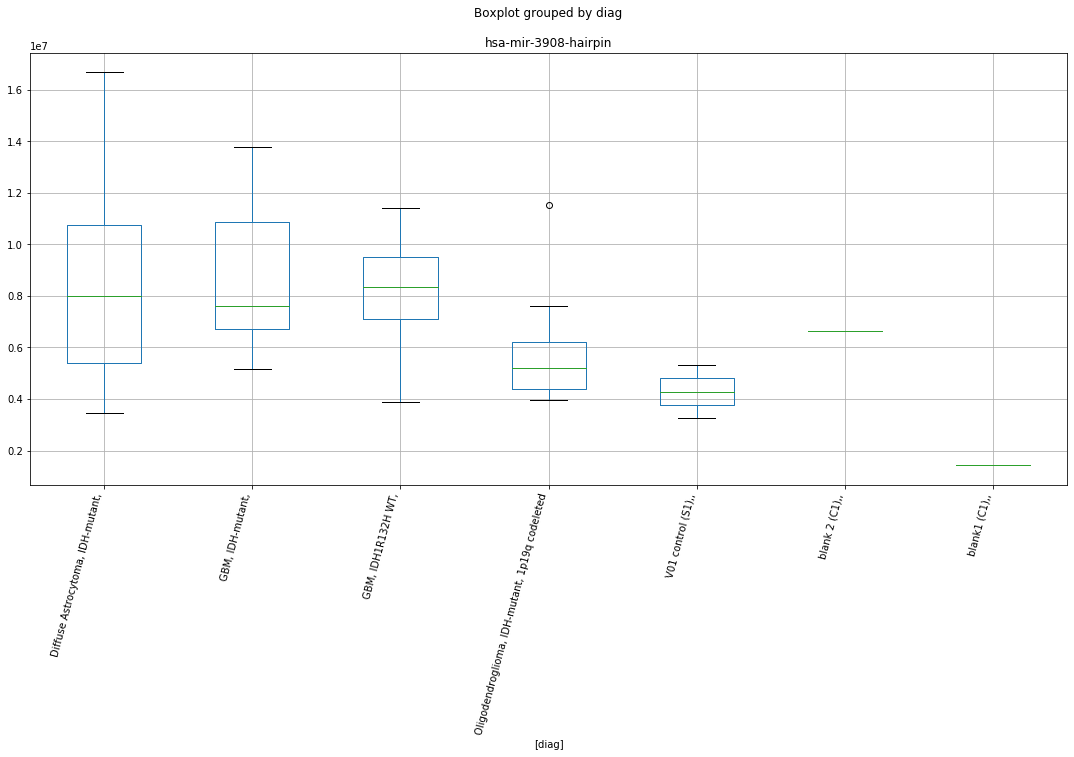

hsa-mir-4668-hairpin D-plex cutadapt1
	t = -1.812668982247556
	p = 0.08659625763795067


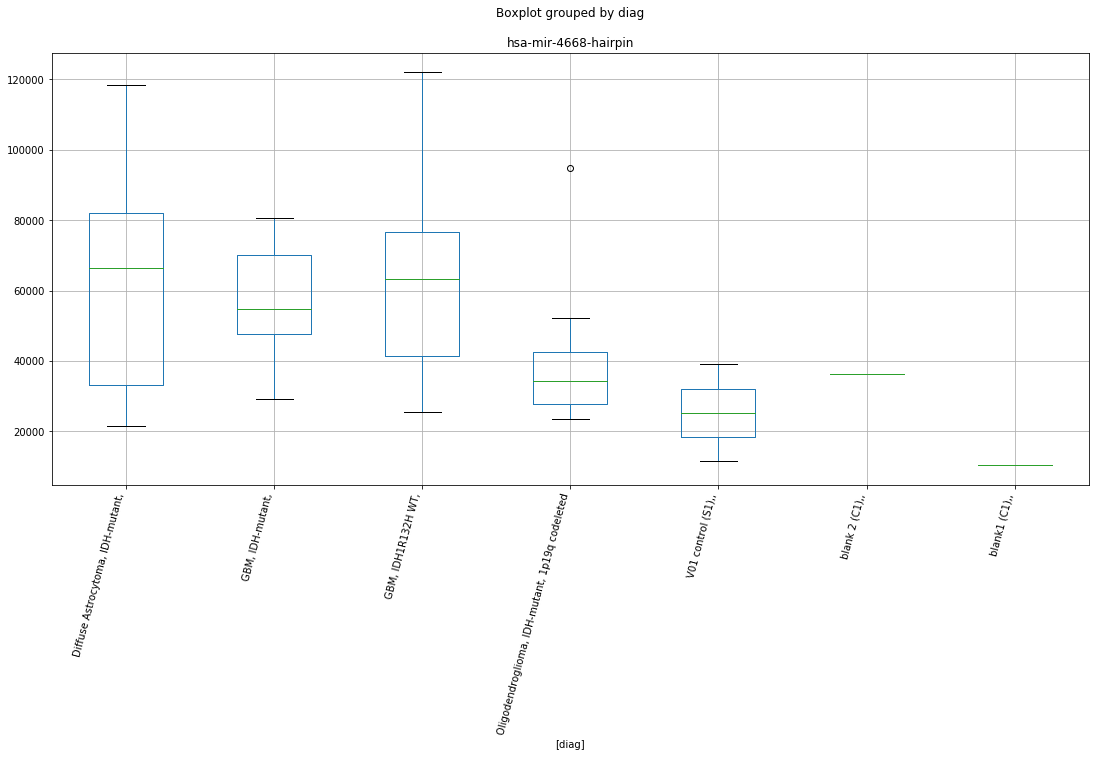

hsa-mir-4668-hairpin D-plex cutadapt2
	t = -1.812668982247556
	p = 0.08659625763795067


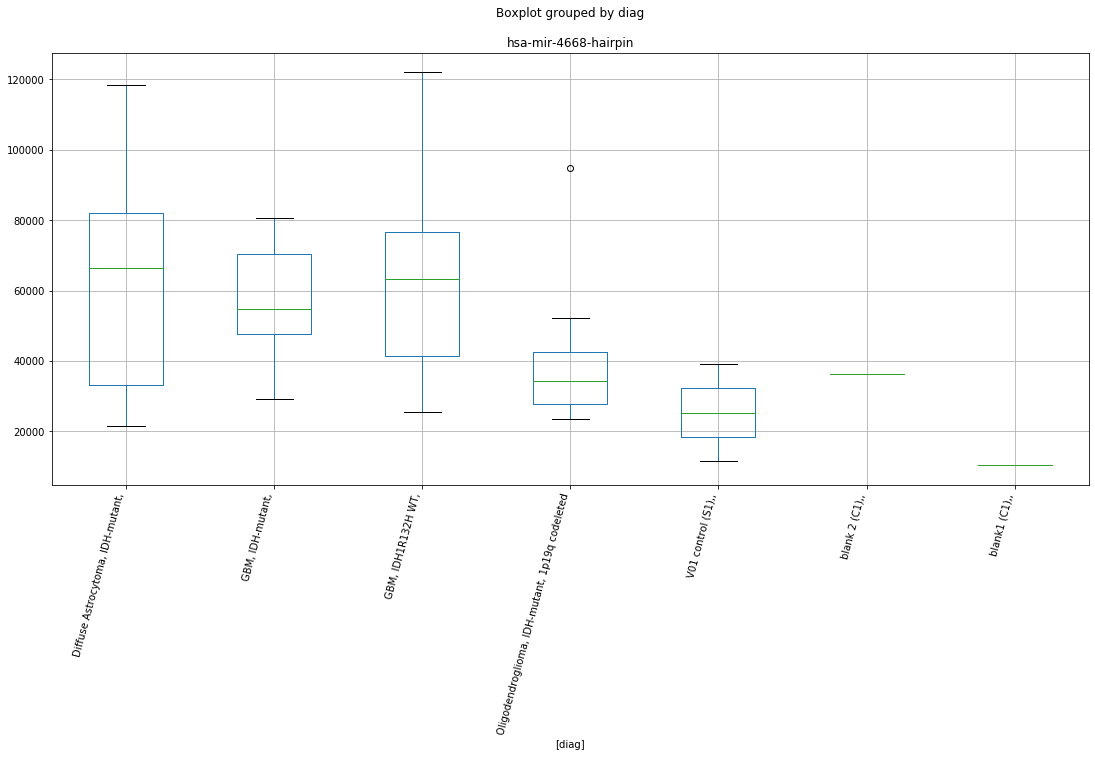

hsa-mir-4668-hairpin D-plex cutadapt3
	t = -1.812668982247556
	p = 0.08659625763795067


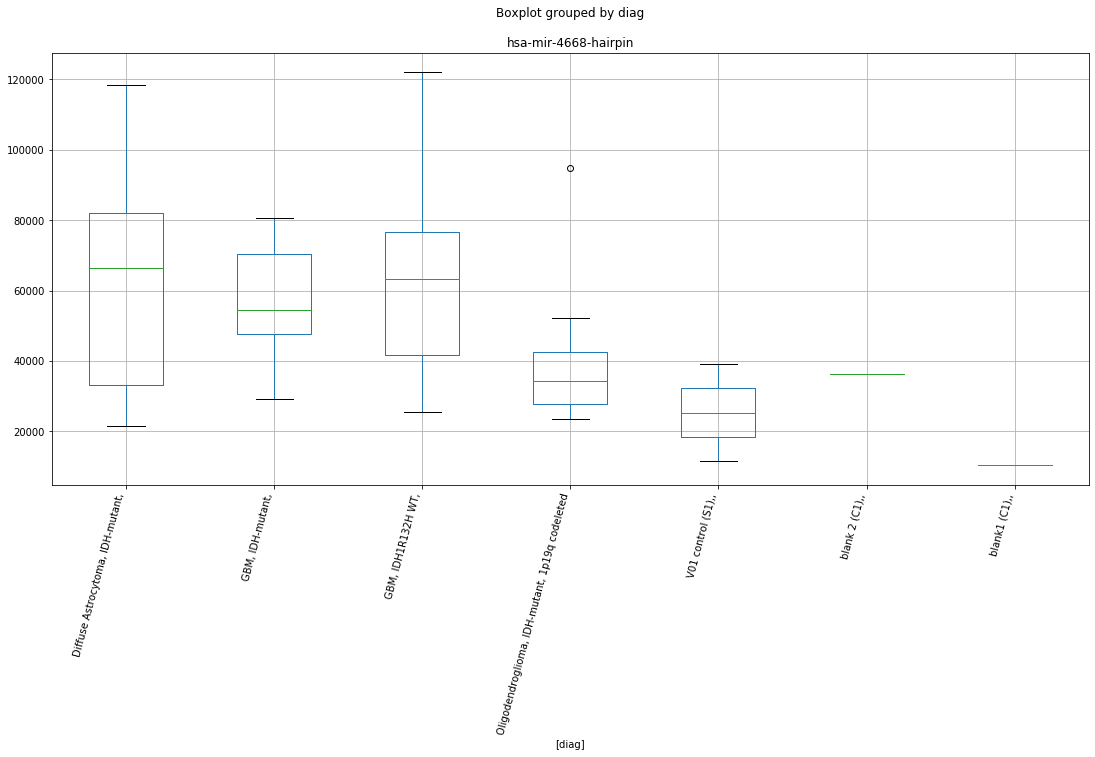

hsa-mir-4668-5p-mature D-plex cutadapt1
	t = -1.890842849591318
	p = 0.07485336934464526


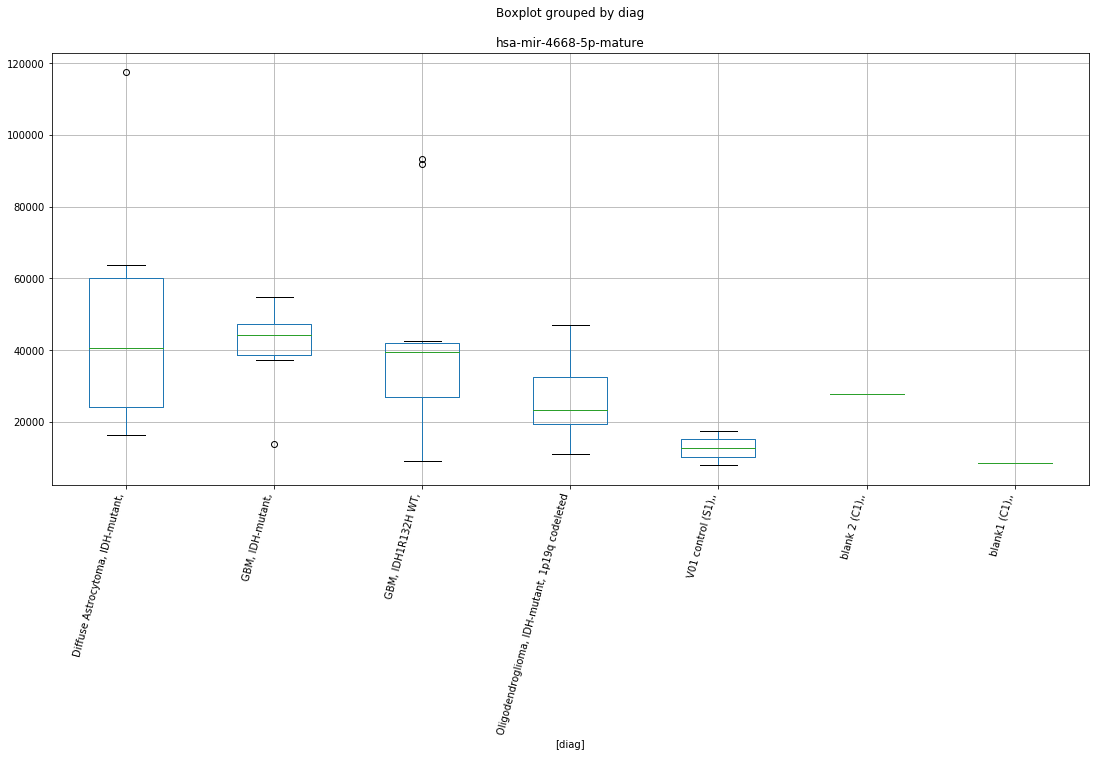

hsa-mir-4668-5p-mature D-plex cutadapt2
	t = -1.890842849591318
	p = 0.07485336934464526


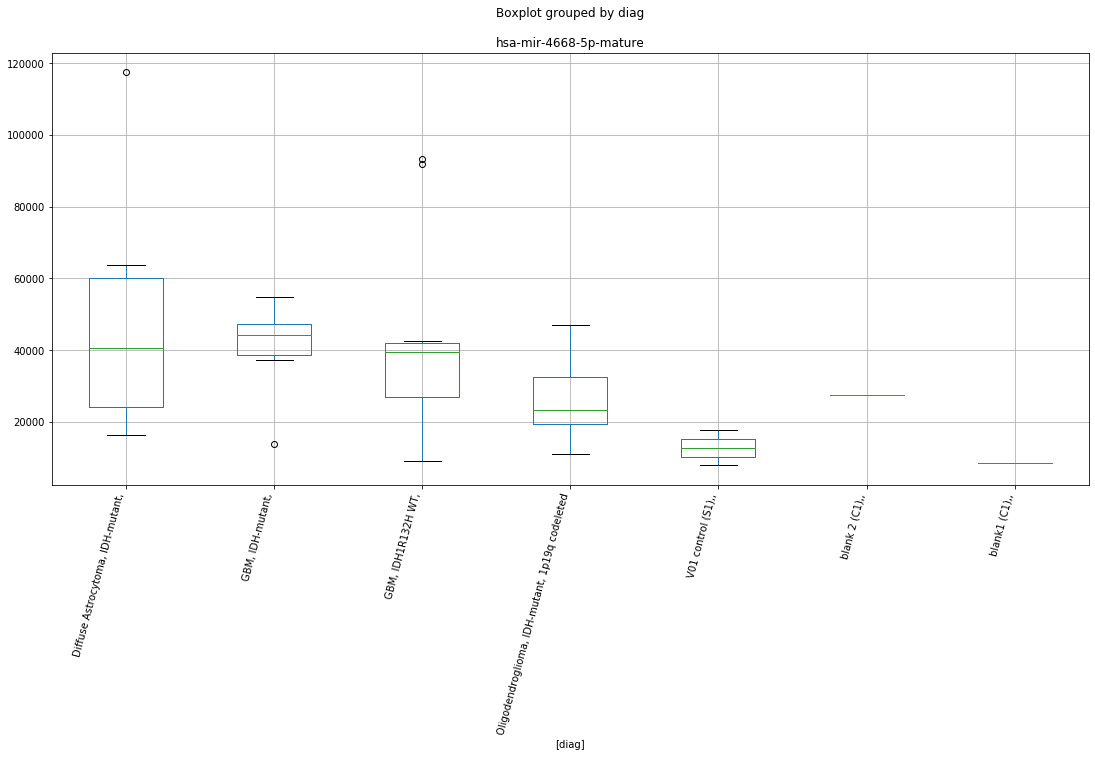

hsa-mir-4668-5p-mature D-plex cutadapt3
	t = -1.890842849591318
	p = 0.07485336934464526


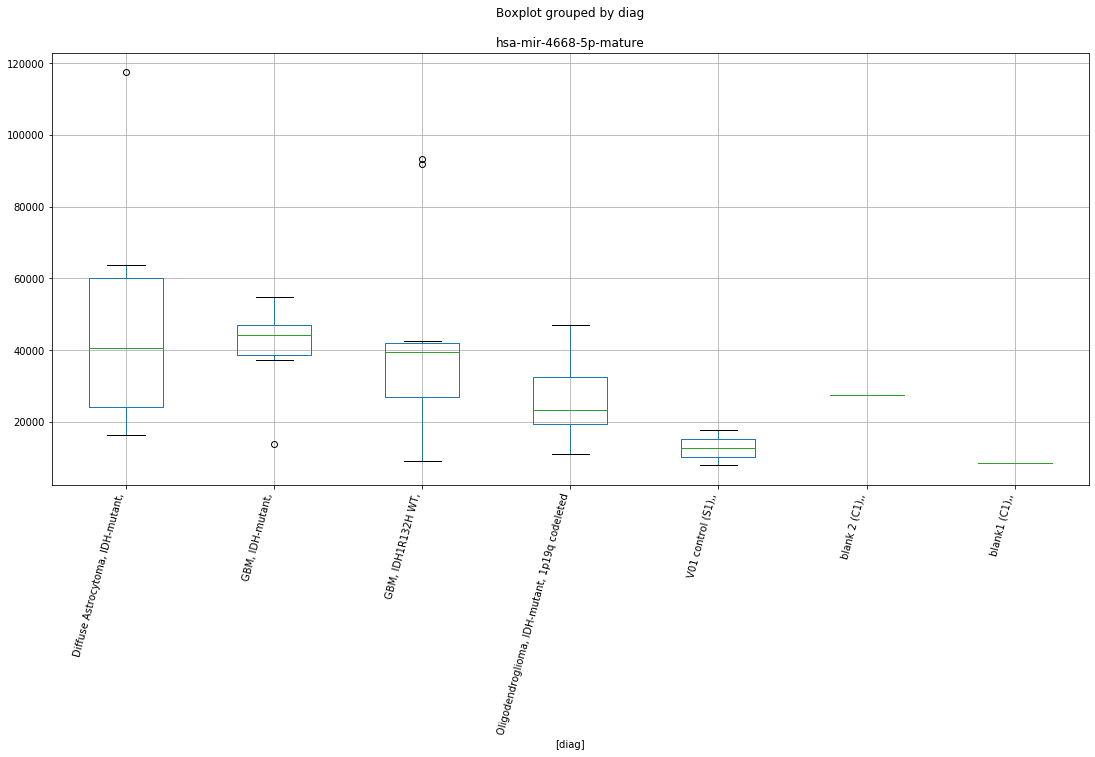

hsa-mir-8052-hairpin D-plex cutadapt1
	t = -1.7362018986444896
	p = 0.0996128447900852


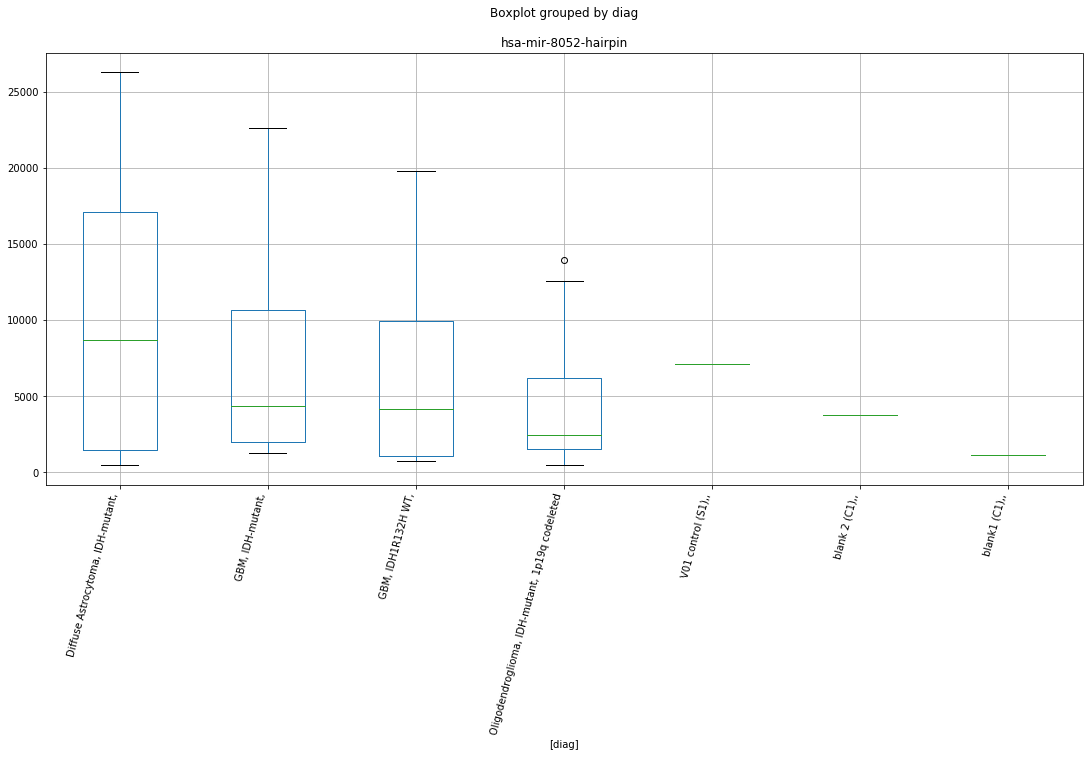

hsa-mir-8052-hairpin D-plex cutadapt2
	t = -1.7362018986444896
	p = 0.0996128447900852


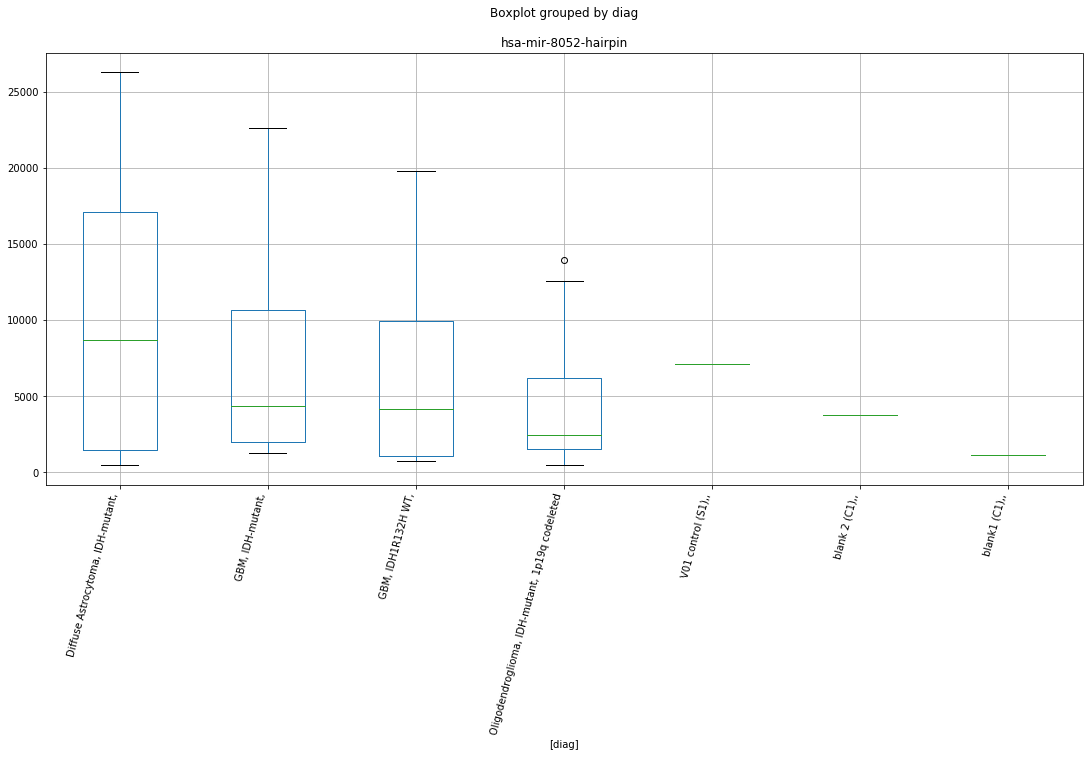

hsa-mir-8052-hairpin D-plex cutadapt3
	t = -1.7362018986444896
	p = 0.0996128447900852


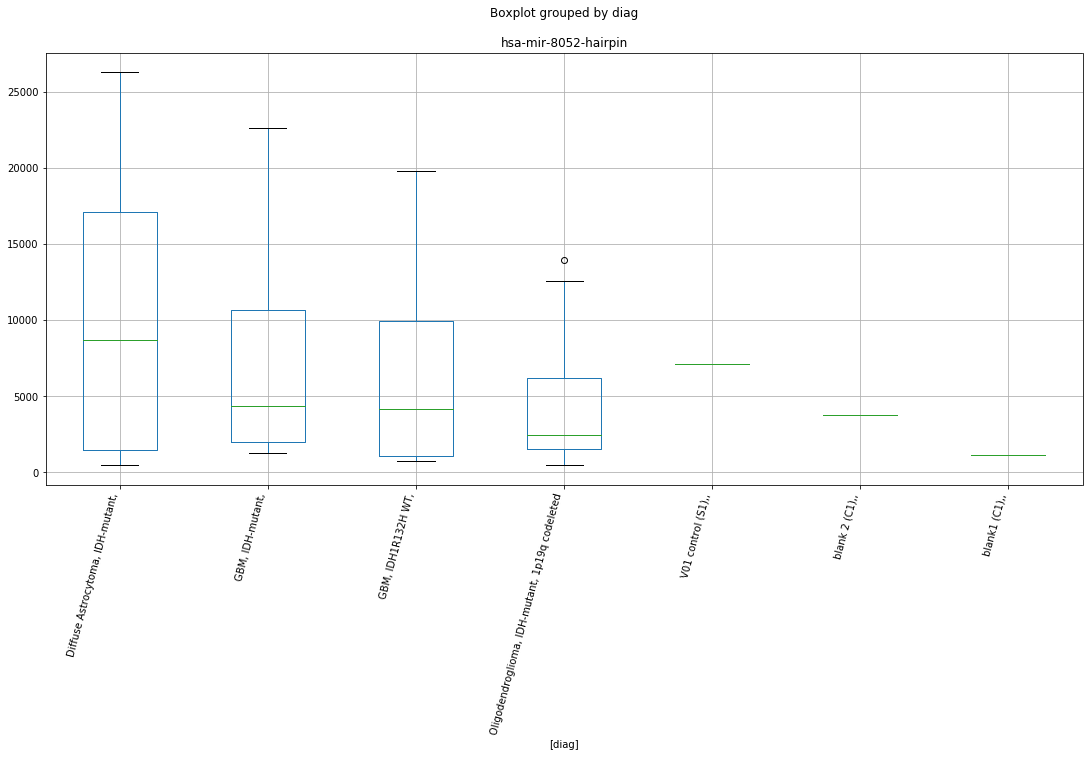

hsa-mir-3613-5p-mature D-plex bbduk2
	t = -1.7687687437897943
	p = 0.09387481979320651


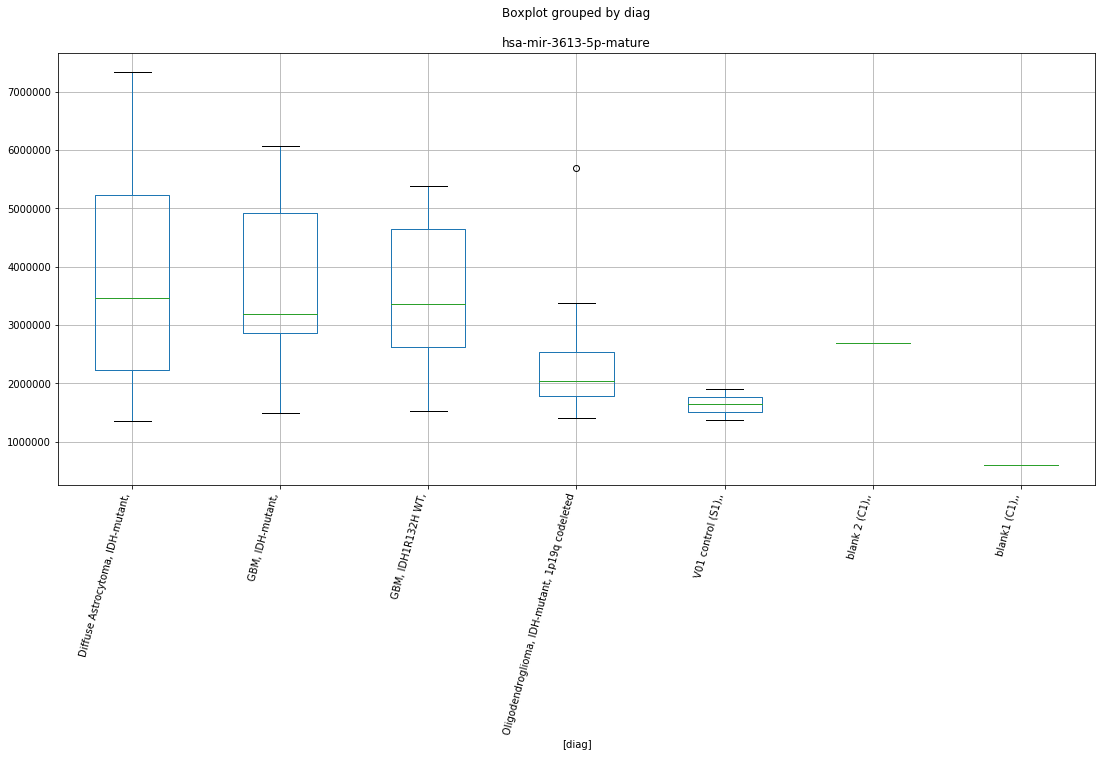

hsa-mir-3613-5p-mature D-plex bbduk3
	t = -1.7597924307981083
	p = 0.09542698405880327


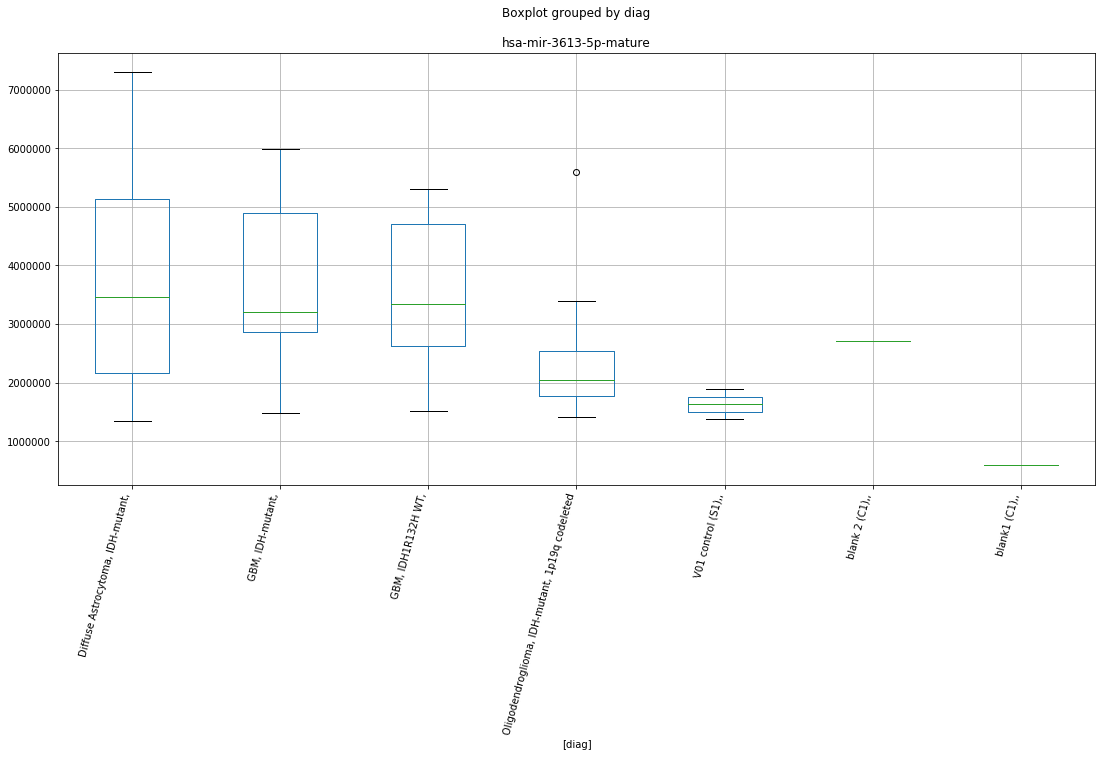

hsa-mir-509-1-hairpin D-plex bbduk2
	t = -2.3942419776572446
	p = 0.027752804387029602


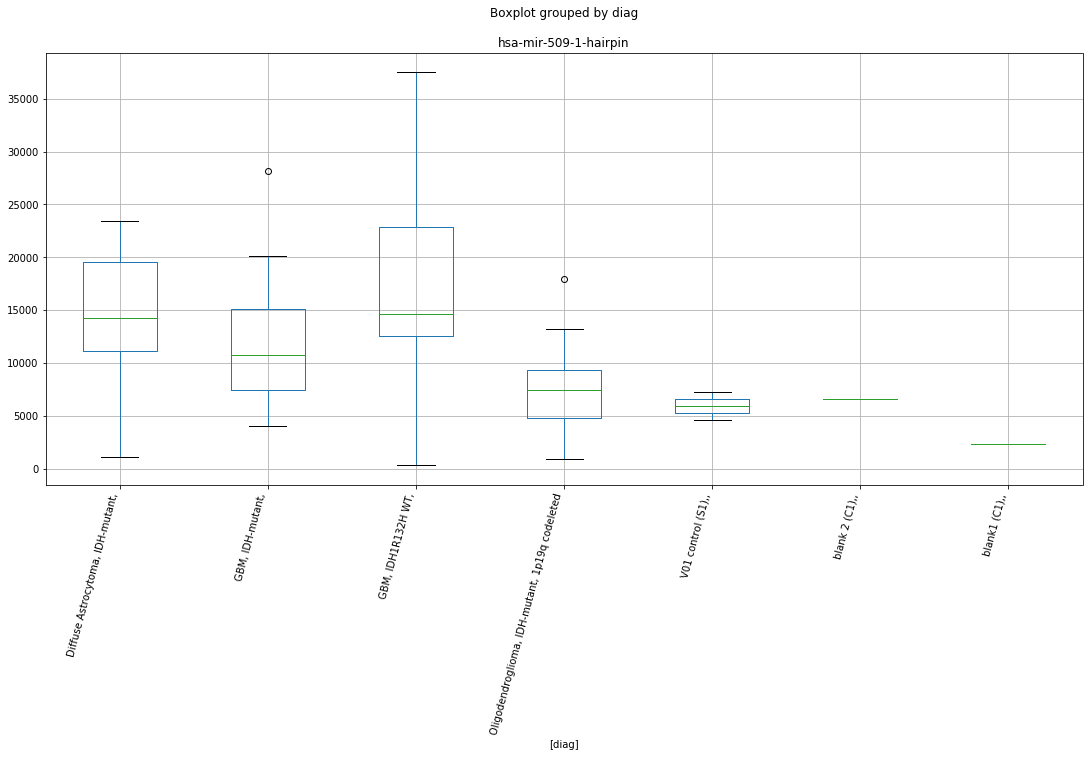

hsa-mir-509-1-hairpin D-plex bbduk3
	t = -2.3780853592744666
	p = 0.02868678970720762


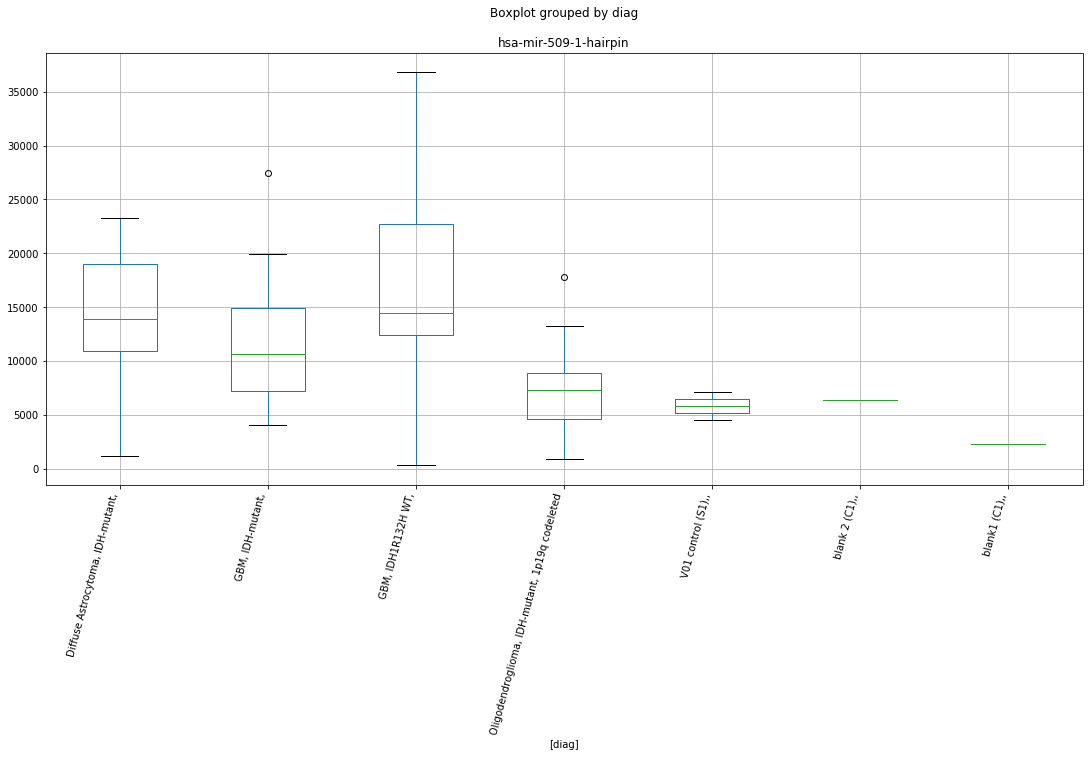

hsa-mir-509-2-hairpin D-plex bbduk2
	t = -2.3995664602615627
	p = 0.027451283442649858


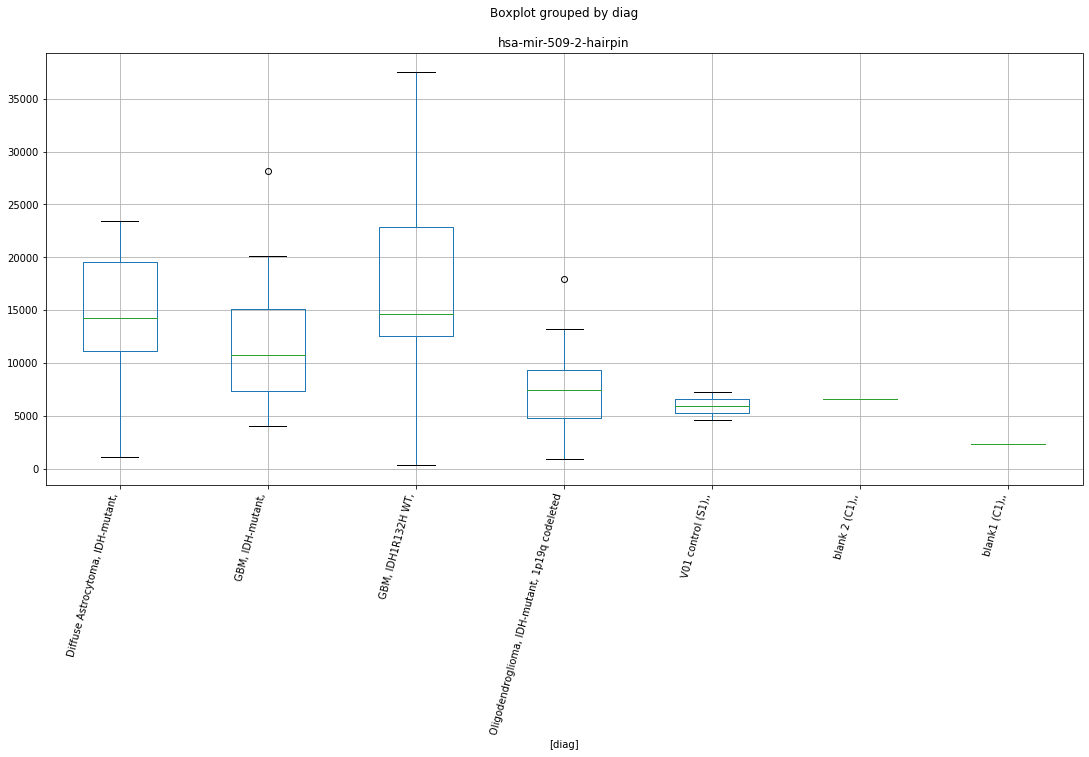

hsa-mir-509-2-hairpin D-plex bbduk3
	t = -2.3834515392768156
	p = 0.0283733731051158


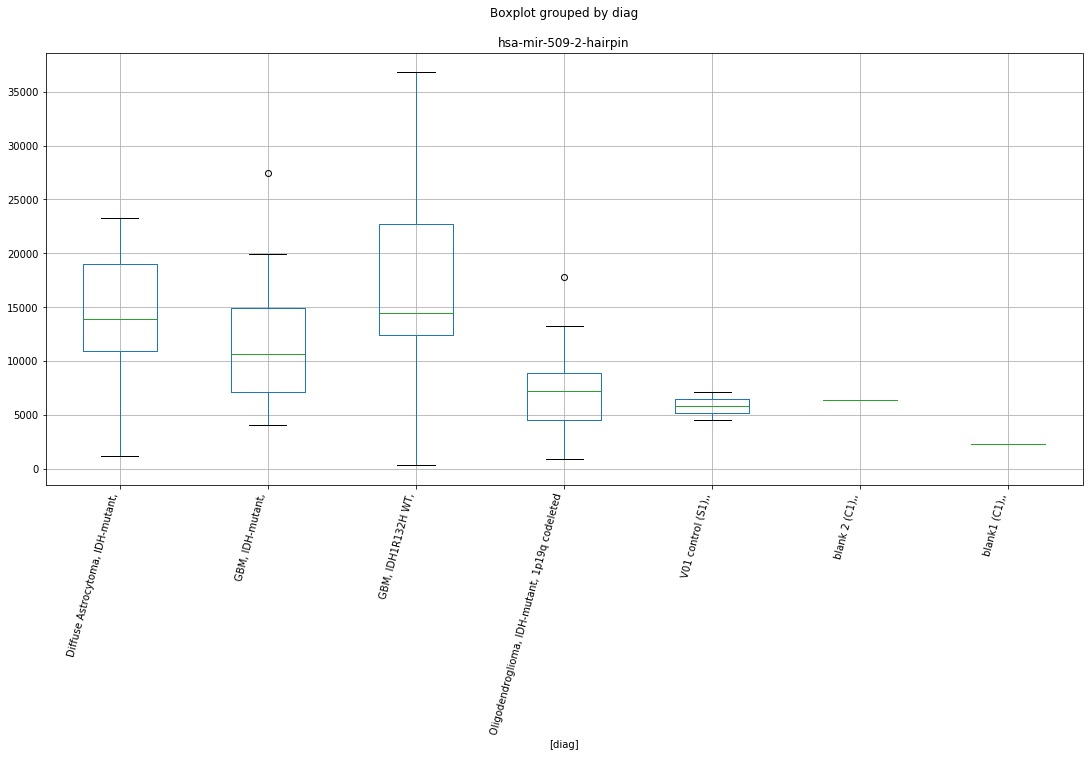

hsa-mir-509-3-hairpin D-plex bbduk2
	t = -2.4000793212036173
	p = 0.027422402843632045


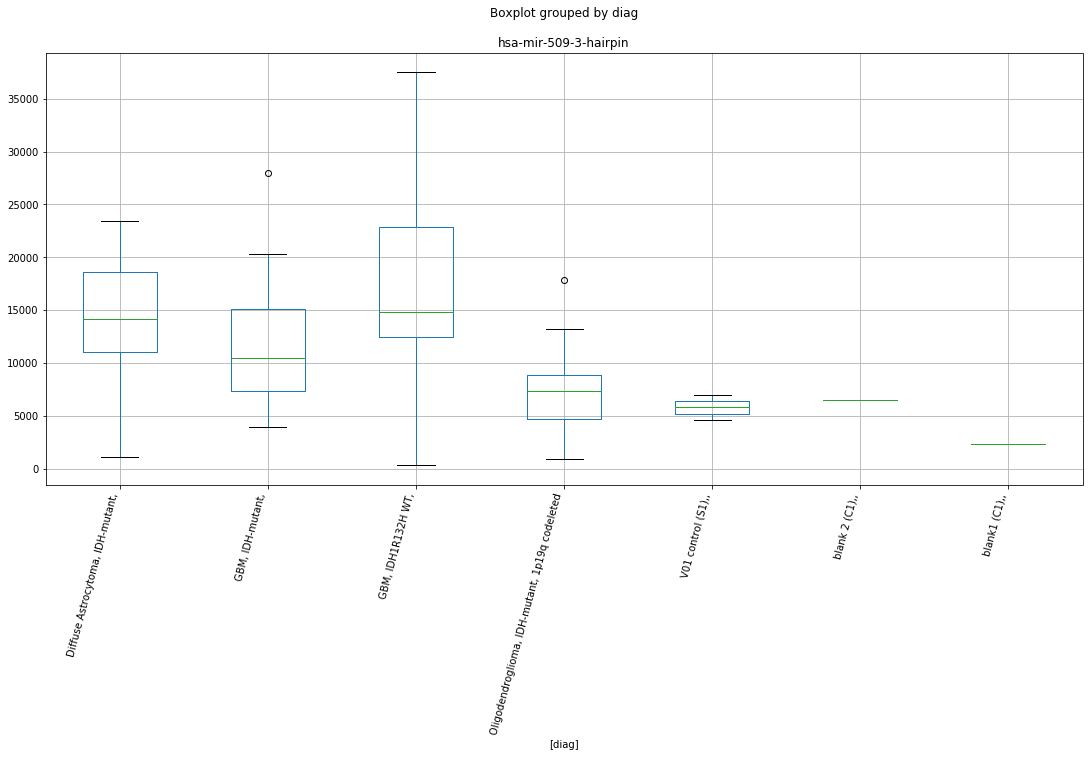

hsa-mir-509-3-hairpin D-plex bbduk3
	t = -2.368021792863344
	p = 0.02928329051002383


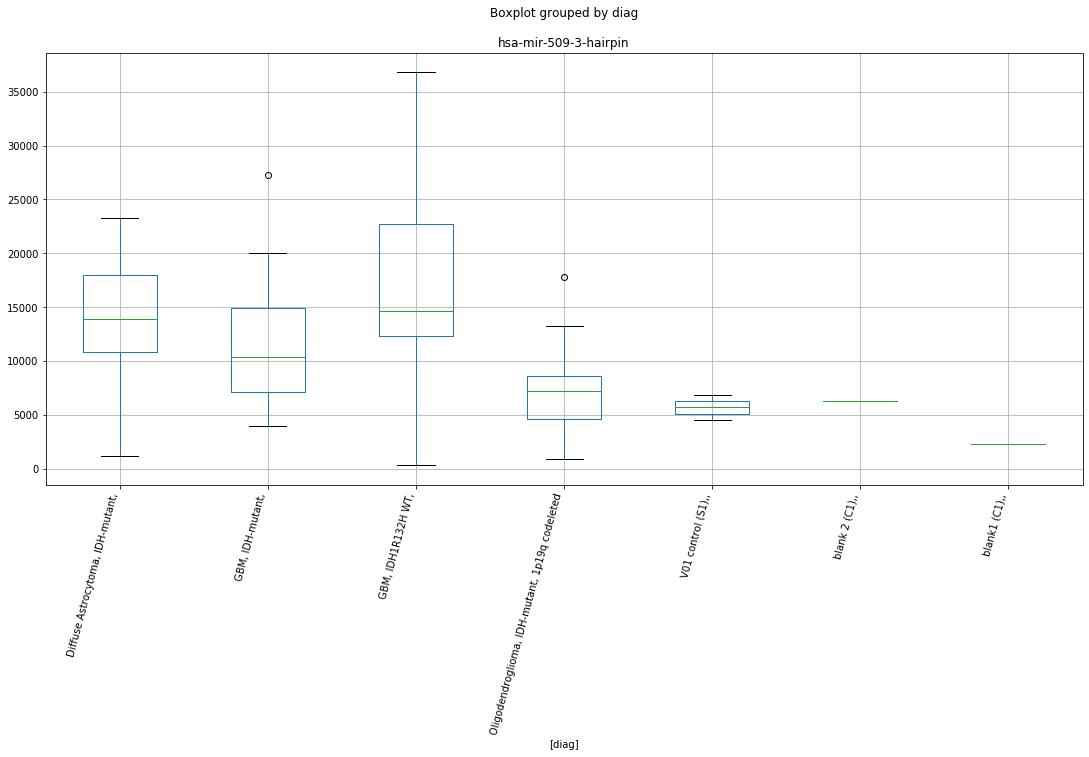

In [42]:
for mirna in mirnas:
    #print()
    for labkit in "D-plex","Lexogen":
        for trimmer in "bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
            t, p = stats.ttest_ind(
                df[((df["Lab kit"]==labkit) & (df["Trimmer"]==trimmer) & 
                    (df["diag"]=="Oligodendroglioma, IDH-mutant, 1p19q codeleted"))][mirna],
                df[((df["Lab kit"]==labkit) & (df["Trimmer"]==trimmer) & 
                    (df["diag"]=="Diffuse Astrocytoma, IDH-mutant,"))][mirna])
            if p < 0.10:
                print(mirna+" "+labkit+" "+trimmer)
                print("\tt = " + str(t))
                print("\tp = " + str(p))
                df[((df["Lab kit"]==labkit) & (df["Trimmer"]==trimmer))].boxplot(column=mirna,by=['diag'])
                plt.xticks(rotation=75,ha='right')
                plt.show()


In [43]:
pd.set_option('display.max_columns', default_max_columns)

In [44]:
pd.set_option('display.max_rows',default_max_rows)

In [45]:
pd.set_option('display.precision', default_precision)